In [1]:
from __future__ import print_function

import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import tarfile
from IPython.display import display, Image
from sklearn.linear_model import LogisticRegression
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle
import tensorflow as tf
from keras import backend as K

Using TensorFlow backend.


In [2]:
from keras import backend as K
from keras.datasets import cifar10
import keras

In [3]:
batch_size = 32 
# 32 examples in a mini-batch, smaller batch size means more updates in one epoch
 
num_classes = 10 #
epochs = 100

In [4]:
import multiprocessing as mp

In [5]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data() 
# x_train - training data(images), y_train - labels(digits)

In [6]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [7]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


In [9]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers import Activation
import keras.utils
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD
from keras.layers import LeakyReLU
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32,32,3),  name= 'conv1', padding ='same', strides= 1))
model.add(BatchNormalization())
convo1 = LeakyReLU(alpha=0.1)
model.add(convo1)
convo2 = MaxPooling2D(pool_size = (2,2))
model.add(Conv2D(32, (3, 3), name= 'conv2', padding = 'same', strides= 1))
model.add(BatchNormalization())
convo3 = LeakyReLU(alpha=0.1)
model.add(convo3)
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64,(3,3), name= 'conv3', padding ='same', strides= 1))
convo4 = model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,(3,3),name = 'conv4', padding ='same', strides=1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
	# Compile model

    
adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics= ['accuracy'])
# initiate RMSprop optimizer
#opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
#model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [10]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test,y_test),shuffle=True)


Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 167s 3ms/step - loss: 0.2316 - acc: 0.9130 - val_loss: 0.1946 - val_acc: 0.9212
Epoch 2/100
50000/50000 [==============================] - 171s 3ms/step - loss: 0.1688 - acc: 0.9334 - val_loss: 0.1570 - val_acc: 0.9386
Epoch 3/100
50000/50000 [==============================] - 159s 3ms/step - loss: 0.1427 - acc: 0.9441 - val_loss: 0.1438 - val_acc: 0.9438
Epoch 4/100
50000/50000 [==============================] - 159s 3ms/step - loss: 0.1258 - acc: 0.9508 - val_loss: 0.1212 - val_acc: 0.9530
Epoch 5/100
50000/50000 [==============================] - 159s 3ms/step - loss: 0.1142 - acc: 0.9554 - val_loss: 0.1204 - val_acc: 0.9535
Epoch 6/100
50000/50000 [==============================] - 159s 3ms/step - loss: 0.1047 - acc: 0.9589 - val_loss: 0.1222 - val_acc: 0.9521
Epoch 7/100
50000/50000 [==============================] - 159s 3ms/step - loss: 0.0975 - acc: 0.9621 - val_loss: 0.

50000/50000 [==============================] - 160s 3ms/step - loss: 0.0172 - acc: 0.9938 - val_loss: 0.1217 - val_acc: 0.9634
Epoch 60/100
50000/50000 [==============================] - 160s 3ms/step - loss: 0.0175 - acc: 0.9937 - val_loss: 0.1256 - val_acc: 0.9643
Epoch 61/100
50000/50000 [==============================] - 160s 3ms/step - loss: 0.0163 - acc: 0.9941 - val_loss: 0.1221 - val_acc: 0.9647
Epoch 62/100
50000/50000 [==============================] - 160s 3ms/step - loss: 0.0170 - acc: 0.9940 - val_loss: 0.1218 - val_acc: 0.9636
Epoch 63/100
50000/50000 [==============================] - 160s 3ms/step - loss: 0.0164 - acc: 0.9941 - val_loss: 0.1231 - val_acc: 0.9638
Epoch 64/100
50000/50000 [==============================] - 160s 3ms/step - loss: 0.0165 - acc: 0.9941 - val_loss: 0.1246 - val_acc: 0.9645
Epoch 65/100
50000/50000 [==============================] - 160s 3ms/step - loss: 0.0171 - acc: 0.9940 - val_loss: 0.1195 - val_acc: 0.9643
Epoch 66/100
50000/50000 [=======

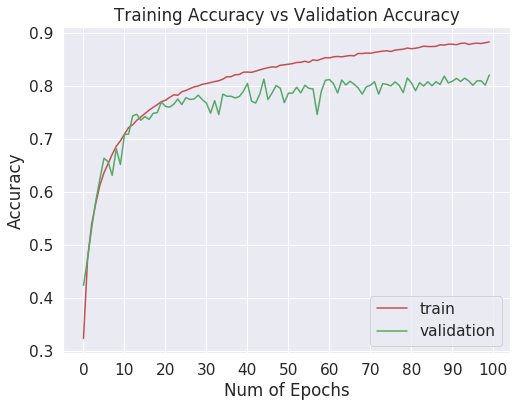

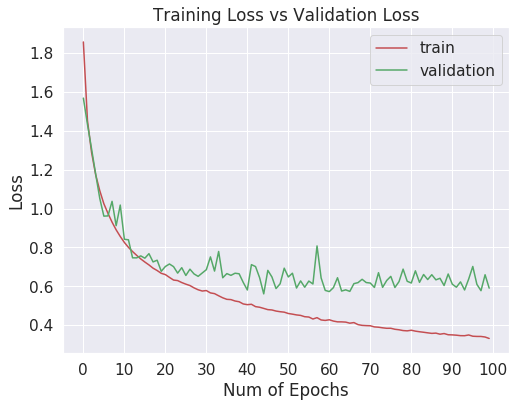

In [41]:
plt.figure(0)
plt.plot(history.history['acc'],'r')
plt.plot(history.history['val_acc'],'g')
plt.xticks(np.arange(0, 101, 10))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])
 
plt.figure(1)
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'g')
plt.xticks(np.arange(0, 101, 10))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])
plt.show()

In [42]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 82.07%


In [31]:
from keras.models import model_from_json
json_file = open('model1.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model1.h5")
print("Loaded model from disk")


Loaded model from disk


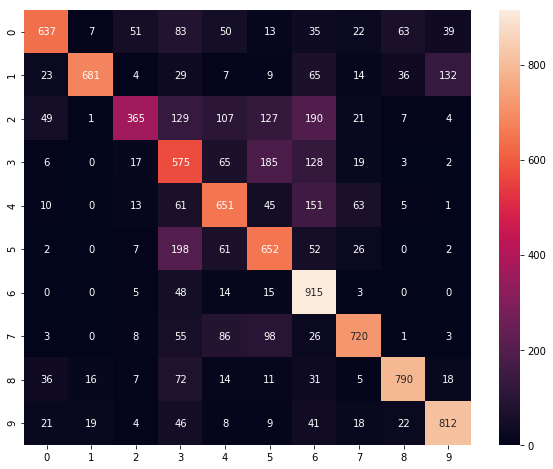

In [11]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
Y_prediction = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_prediction,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx, annot=True, fmt="d");

In [47]:
from sklearn.metrics import *
import numpy as np

Y_test = np.argmax(y_test, axis=1) # Convert one-hot to index
y_pred = model.predict_classes(x_test)
print(classification_report(Y_test, y_pred))

             precision    recall  f1-score   support

          0       0.77      0.72      0.74      1000
          1       0.89      0.79      0.84      1000
          2       0.47      0.71      0.56      1000
          3       0.64      0.34      0.45      1000
          4       0.67      0.62      0.65      1000
          5       0.66      0.55      0.60      1000
          6       0.60      0.88      0.71      1000
          7       0.86      0.67      0.75      1000
          8       0.75      0.90      0.82      1000
          9       0.85      0.78      0.82      1000

avg / total       0.72      0.70      0.69     10000



In [58]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
__________

In [54]:
model_json = model.to_json()
with open("model1.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model1.h5")
print("Saved model to disk")

Saved model to disk


In [1]:
from keras.models import model_from_json
json_file = open('model1.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model1.h5")
print("Loaded model from disk")


Using TensorFlow backend.


Loaded model from disk


In [24]:
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(x_train, y_train, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

acc: 89.10%


10000/10000 [==============================] - 5s 481us/step


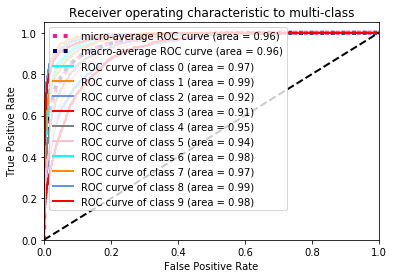

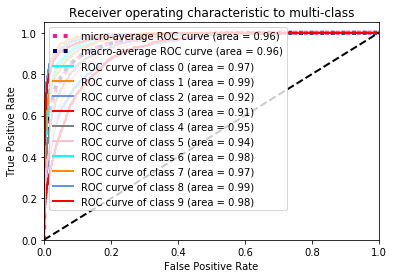

In [66]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import label_binarize
from scipy import interp
from itertools import cycle

n_classes = 10

from sklearn.metrics import roc_curve, auc

# Plot linewidth.
lw = 2
model_pred = model.predict(x_test, batch_size=200, verbose=1) 
#snn_predicted = np.argmax(snn_pred, axis=1)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], model_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), model_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'gray', 'pink'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic to multi-class')
plt.legend(loc="upper left")
plt.show()


# Zoom in view of the upper left corner.
plt.figure(2)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'gray', 'pink'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic to multi-class')
plt.legend(loc="upper left")
plt.show()


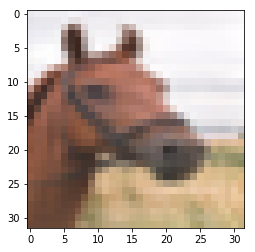

In [101]:
import numpy as np
import matplotlib.pyplot as plt
img_to_visualize = x_test[99]
# Keras requires the image to be in 4D
# So we admension to it.

plt.imshow(img_to_visualize)

In [102]:
from keras.models import Model
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(x_test[99].reshape(-1,32,32,3))
 
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*3.5,col_size*2.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index])
            activation_index += 1

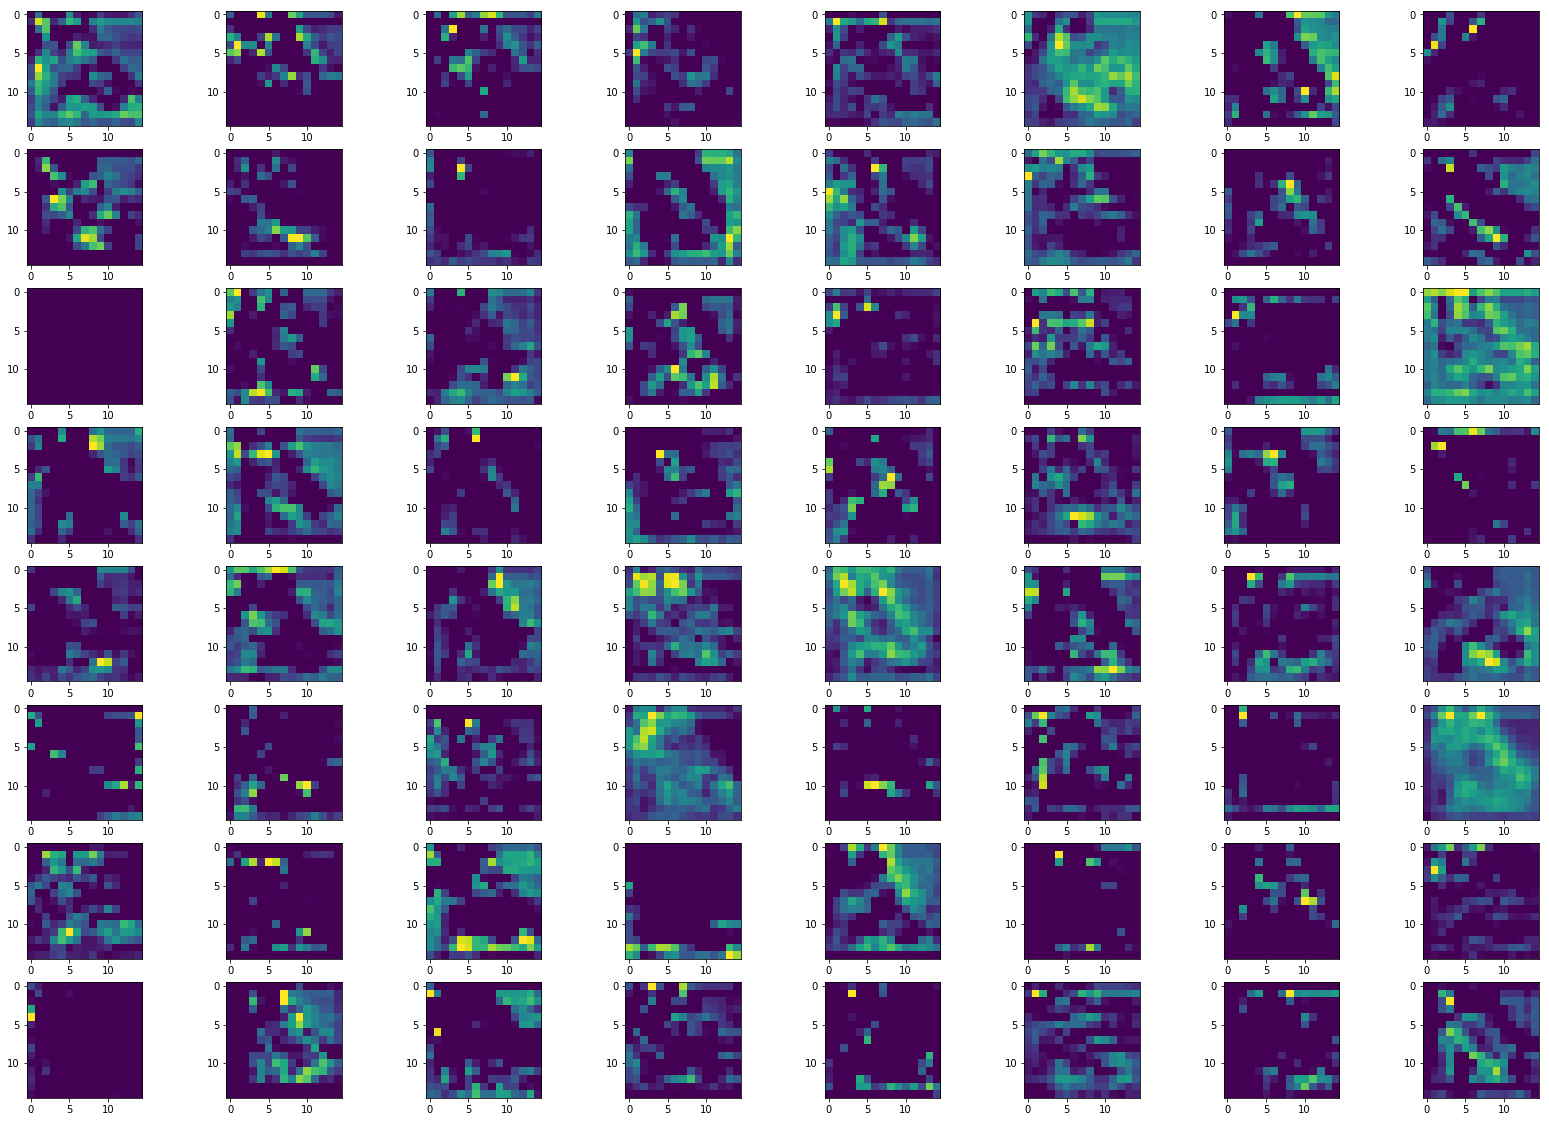

In [106]:
display_activation(activations, 8, 8, 7)